<a href="https://colab.research.google.com/github/nladocsi/eda_assignment/blob/main/eda_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds3001f25/eda_assignment.git`
### Do Q1, Q2, and Q3.


**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [1]:
#1.4
#If it is a non-decreasing transformation of the median then median(f(x)) = f(median(x)).
#This can be explained because the median is a order statistic. The median relies on a sorted order of values.
#In a non-decreasing transformation the relative order of the data points does not change.
#This does apply to any quantile, and the IQR, but not the range because the range does not just rely on order but actual value.

#1.5
#No it is not always true that m(g(X)) = g(m(X)). Mean is not an order function it depends on the actual values of the data.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#2.1
air = pd.read_csv('airbnb_hw.csv')

In [3]:
#2.2
print("air.shape:")
print(air.shape, '\n')
print('30478 observations', '\n')
#There are 30478 observations
print("air.variables:")
print(air.columns, '\n')

print(air.head())

air.shape:
(30478, 13) 

30478 observations 

air.variables:
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room

There are 30478 observations

*   Dimensions: 30478, 13
*   There are 30478 observations
*   The variables included are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds Number of Records, Number Of Reviews, Price, Review Scores Rating'






In [4]:
#2.3
pd.crosstab(air['Room Type'], air['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


*   Patterns: The more unique, non traditional rentals are less popular (ex apartments = lots, castles = one). Overall shared rooms are the least ppopular.
*   Private rooms are more common than entire property for Bed & Breakfast, Homes, dorms, treehouses, huts, castles, chalets and other

<Axes: >

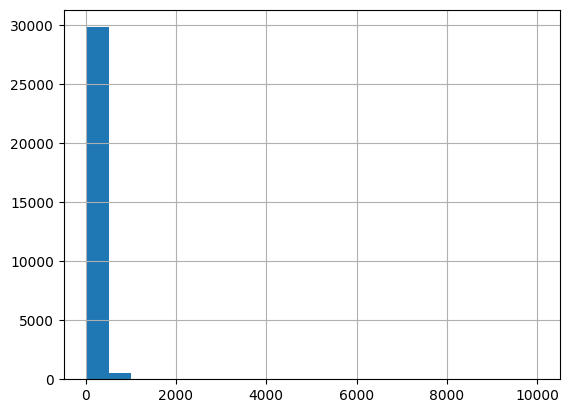

In [5]:
#2.4.1
if air ['Price'].dtype == 'object':
  air['Price'] = air['Price'].str.replace(',', '', regex=False)
  air['Price'] = pd.to_numeric(air['Price'], errors='coerce')
#print(air['Price'].value_counts(), '\n')
#print(air['Price'].unique(),'\n')
#Histogram
air['Price'].hist(bins=20)
#clip_price = air['Price'].clip(upper=300)
#clip_price.hist(bins=20)

<Axes: ylabel='Density'>

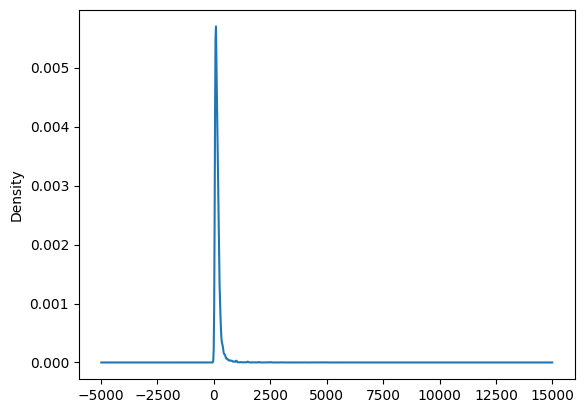

In [6]:
#2.4.2
#Kernel Density
air['Price'].plot.density()
#clip_price.plot.density()

<Axes: >

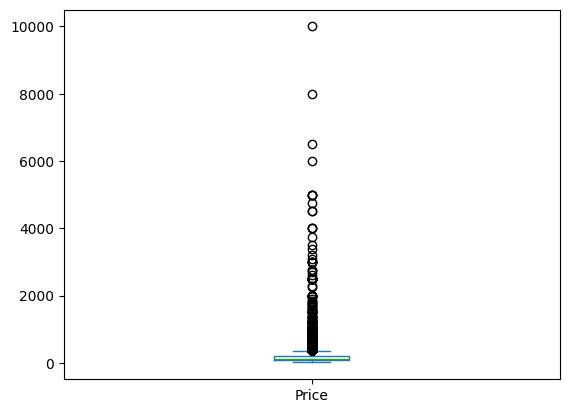

In [7]:
# 2.4.3
air['Price'].plot.box()
#clip_price.plot.box()
#  box plot, and a statistical description of the variable

In [8]:
#2.4.3
print(air['Price'].describe())

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


*  In my opinion the data is not well scaled because the min and max have such a great differnece, and the 75% is so much smaller than the max.
*   Yes there are significant outliers

<Axes: >

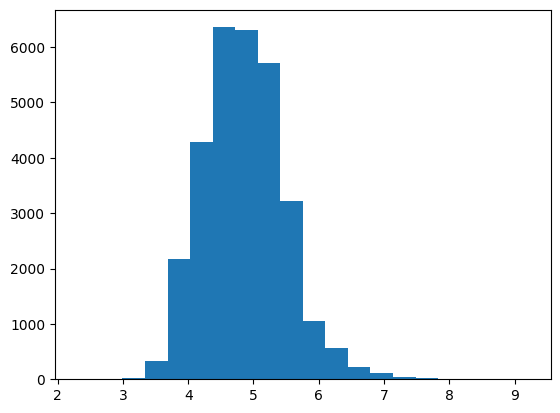

In [9]:
#2.4.4
air['Price_log'] = np.log(air['Price'])
air.loc[air['Price_log']>0,'Price_log'].hist(bins=20,grid=False)

<Axes: ylabel='Density'>

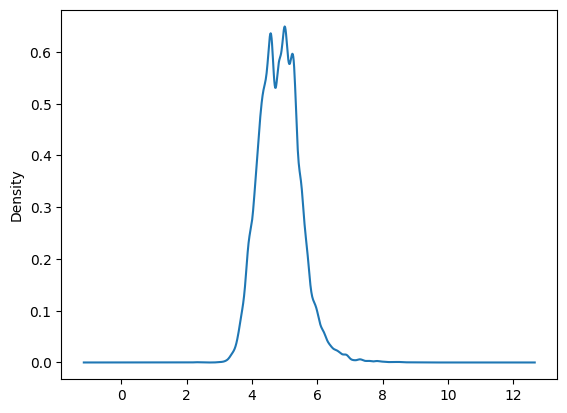

In [10]:
air['Price_log'].plot.density()

<Axes: >

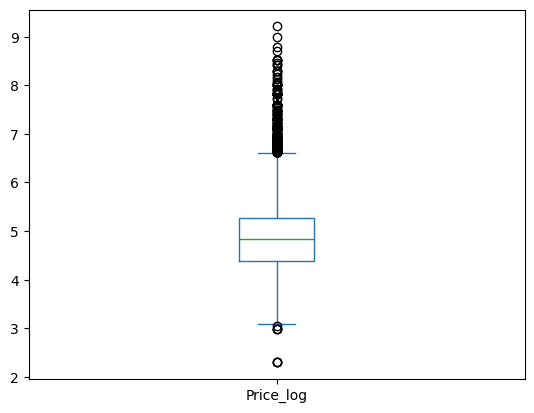

In [11]:
air['Price_log'].plot.box()

In [12]:
print(air['Price_log'].describe())

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: Price_log, dtype: float64


,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


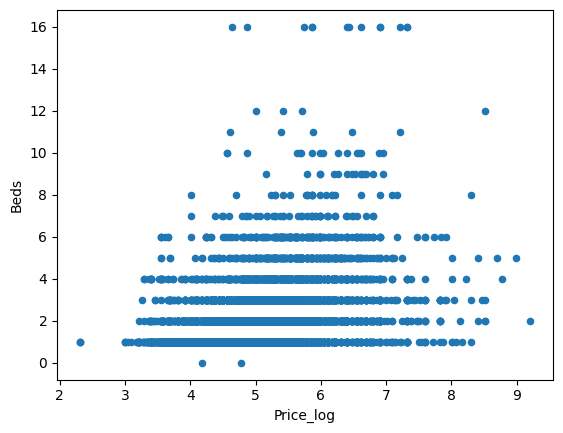

In [13]:
#2.5
#print(air['Beds'].unique(),'\n')
air.plot.scatter(x='Price_log', y='Beds')
air.groupby('Beds')['Price'].describe()

*   In the scatterplot I see that majority of the airbnb's have 1-6 beds. Interestingly the max is 16 beds and the min is 0 beds. The cheapest airbnbs have the least number of beds. The greatest range of price has least amounts of beds. The more beds the smaller the price rage.  
*   The largest price mean is for 12 beds (very few  airbnbs have 12 beds). Generally as the bed number increases the mean price increases. More price variablility with more beds (SD increases).

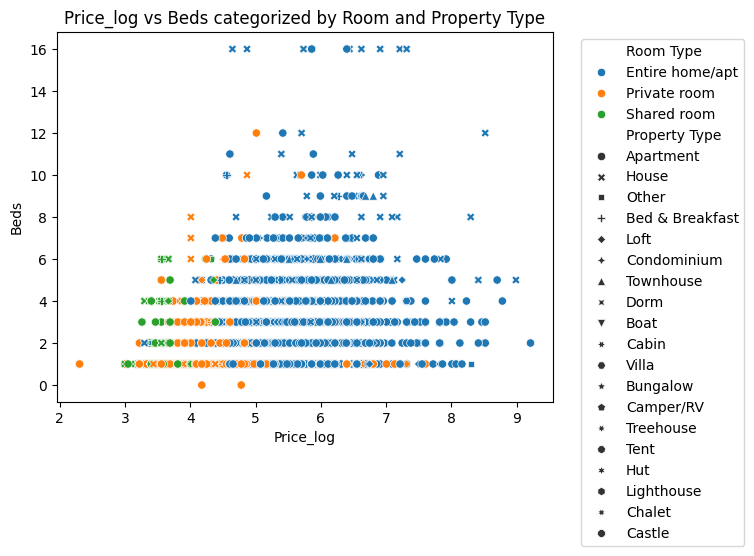

In [14]:
#2.6
import seaborn as sns
plot_1 = sns.scatterplot(data=air, x='Price_log', y="Beds", hue='Room Type', style='Property Type')
plot_1.set(title='Price_log vs Beds categorized by Room and Property Type')
sns.move_legend (plot_1, "upper right", bbox_to_anchor=(1.4, 1))

*   The entire homes/apt are the most expensive airbnbs. The most popular rentals are entire homes/apts too. The least popular room types are shared rooms. Those are also typically the least expensive. Also it appears that the number of beds doesn't necesarrily increase the price. Apartment is the most popular property type.
*   In my opinion this is not a good scatter plot or way to visualize this data because there are way too many property type observations and the shapes look very similar.

In [15]:
air.loc[:,['Property Type','Room Type','Price']].groupby(['Property Type','Room Type']).describe()


#Entire homes/apartments have the highest prices on average. With entire homes/apartments having the highest prices for Room Type.

Price                                  \
                                   count        mean          std    min   
Property Type   Room Type                                                  
Apartment       Entire home/apt  15669.0  213.224839   218.097834   10.0   
                Private room     10748.0   92.713900    65.237050   10.0   
                Shared room        685.0   79.200000    67.720849   20.0   
Bed & Breakfast Entire home/apt     13.0  184.538462   119.814172   85.0   
                Private room       155.0   97.161290    47.031971   32.0   
                Shared room         12.0  143.666667   245.328104   30.0   
Boat            Entire home/apt      7.0  158.428571    51.110524  100.0   
                Private room         1.0  120.000000          NaN  120.0   
Bungalow        Entire home/apt      4.0  150.750000    46.464144   87.0   
Cabin           Entire home/apt      1.0  250.000000          NaN  250.0   
                Private room         1.0   80.000000          NaN   80.0   
Camper/RV       Entire home/apt      6.0  114.333333   107.685963   45.0   
                Private room         1.0   39.000000          NaN   39.0   
Castle          Private room         1.0  150.000000          NaN  150.0   
Chalet          Private room         1.0   99.000000          NaN   99.0   
Condominium     Entire home/apt     72.0  304.861111   266.197497   80.0   
                Private room        22.0   98.590909    40.576394   46.0   
Dorm            Entire home/apt      4.0   44.250000    24.060687   30.0   
                Private room        16.0   86.562500    40.738137   50.0   
                Shared room         11.0   73.181818    46.328864   30.0   
House           Entire home/apt    752.0  297.263298   468.409428   27.0   
                Private room      1258.0   77.750397    49.402650   25.0   
                Shared room         80.0   77.487500   275.409936   10.0   
Hut             Private room         2.0   75.000000    35.355339   50.0   
Lighthouse      Entire home/apt      1.0   39.000000          NaN   39.0   
Loft            Entire home/apt    392.0  330.510204   321.519721   55.0   
                Private room       312.0  108.057692   128.817912   39.0   
                Shared room         49.0   78.816327    87.521824   30.0   
Other           Entire home/apt     14.0  843.428571  1133.062271   66.0   
                Private room        29.0  211.931034   235.404505   39.0   
                Shared room          4.0  148.750000   134.806961   70.0   
Tent            Private room         4.0  126.250000    94.989034   40.0   
Townhouse       Entire home/apt     83.0  280.783133   314.605252   66.0   
                Private room        52.0   83.365385    30.578109   45.0   
                Shared room          1.0   95.000000          NaN   95.0   
Treehouse       Private room         1.0   95.000000          NaN   95.0   
                Shared room          3.0  167.666667   114.788211   95.0   
Villa           Entire home/apt      4.0  529.750000   650.963581  120.0   
                Private room         4.0  126.250000    71.107313   60.0   

                                                                  
                                    25%    50%      75%      max  
Property Type   Room Type                                         
Apartment       Entire home/apt  135.00  175.0   235.00  10000.0  
                Private room      65.00   82.0   102.00   3000.0  
                Shared room       49.00   66.0    90.00   1000.0  
Bed & Breakfast Entire home/apt  121.00  130.0   220.00    525.0  
                Private room      65.00   85.0   117.00    260.0  
                Shared room       42.50   65.0    81.00    900.0  
Boat            Entire home/apt  122.50  150.0   182.00    250.0  
                Private room     120.00  120.0   120.00    120.0  
Bungalow        Entire home/apt  133.50  160.5   177.75    195.0  
Cabin           Entire home/apt  250.0

*   The entire home/apt have the highest mean prices. The other category which I assume includes some very unique non traditional homes have the highest mean prices for property type. The same property and room type have the highest standard deviations.
*   I would estimate that the median is a more reliable estimate of central tendency due to the outliers in this dataset.

**Q3.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [16]:
#3.1
drill = pd.read_csv('drilling_rigs.csv')

print("drill.shape:")
print(drill.shape, '\n')
print(drill.columns, '\n')
print(drill.dtypes, '\n')

drill.head()



#var = "Month"
#print(drill[var].unique(),'\n')


drill.shape:
(623, 10) 

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)'],
      dtype='object') 

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Ri

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


*   There are 623 observations and 10 variables.
*   here are several data points that are typed as object that need to be coerced/typecasted to become an int. Some will need to change from objects to ints while others will also need to have undefiend observations naned.

In [17]:
#3.2
drill['time'] = pd.to_datetime(drill['Month'], format='mixed')


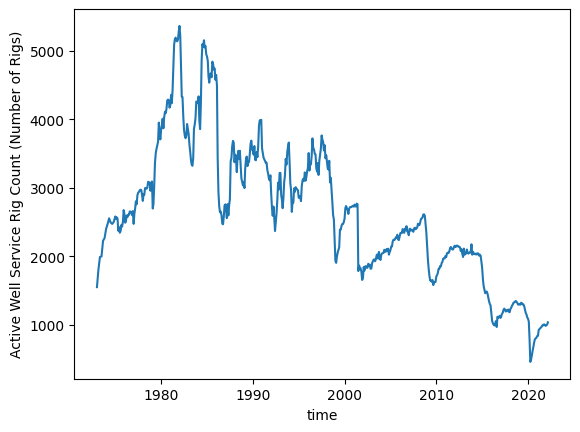

In [18]:
#3.3
var = "Active Well Service Rig Count (Number of Rigs)"
drill[var] = drill[var].replace('Not Available',np.nan)
#print(drill[var].unique(),'\n')
drill[var] = pd.to_numeric(drill[var], errors='coerce')

AWS = sns.lineplot(data = drill, x ='time', y = var)

*  I see a large increase in Active Well Service Rig Count around 1981-1984. From 1985 on there is a overall decrease. Interestingly the decrease is not at all linear and has slight peaks and drops all the way till 2020.
*  Around 2015 the number of Rigs reaches the same low it was at in 1973.

[Text(0.5, 1.0, 'Differences over Time')]

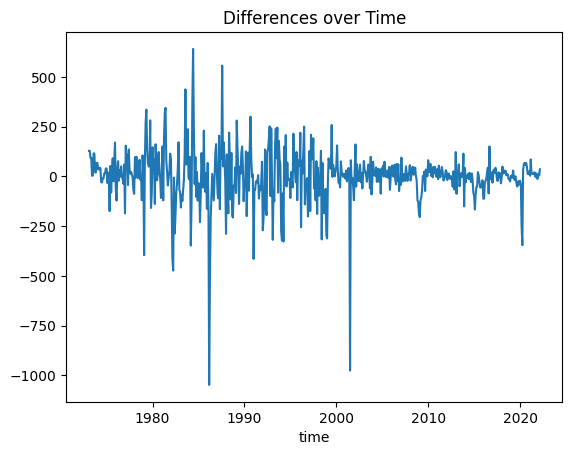

In [19]:
#3.4
new = drill.sort_values('time')
y = new[var].to_numpy()
t = len(y)
diff = y[1:]-y[:(t-1)]
fig = sns.lineplot(x=drill['time'][1:],y=diff)
fig.set(title='Differences over Time')

*   In this differences graph as time goes on the difference gets more narrow and less big. With a few drastic spikes around 1986 and 2003 the rest are pretty consistant.



In [20]:
#3.5
var1 = "Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)"
var2 = "Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)"

on = drill.melt(id_vars=['time'], value_vars=[var1, var2])
on.head()

,time,variable,value
0,1973-01-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1120
1,1973-02-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,1037
2,1973-03-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,959
3,1973-04-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,914
4,1973-05-01,Crude Oil and Natural Gas Rotary Rigs in Opera...,974


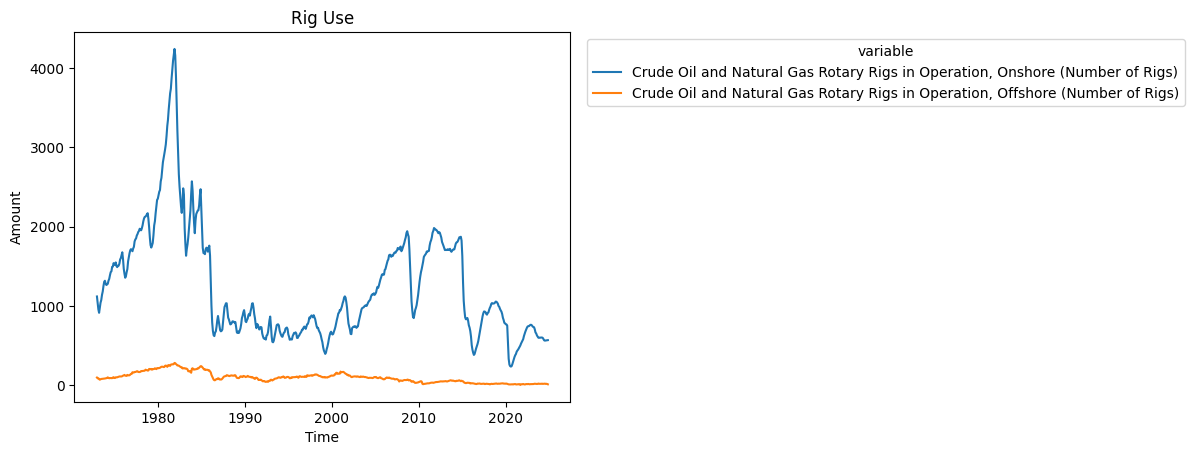

In [21]:
rig_fig = sns.lineplot(data=on,x='time',y='value',hue='variable')
rig_fig.set(title='Rig Use',xlabel='Time',ylabel='Amount')
sns.move_legend(rig_fig, "upper left", bbox_to_anchor=(1.02, 1))